In [1]:
# Load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
from sklearn.metrics import roc_auc_score, roc_curve

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

# 1. Data Acquisition and Loading

- Link : https://www.kaggle.com/datasets/ifteshanajnin/carinsuranceclaimprediction-classification

In [2]:
# read a csv file and create a dataframe
df = pd.read_csv("data/train.csv")

In [3]:
df['is_claim'].value_counts()

0    54844
1     3748
Name: is_claim, dtype: int64

In [4]:
# Display the top 10 rows of a dataframe
print("First ten rows of the dataset:")
df.head(10)

First ten rows of the dataset:


,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
5,ID00006,1.018709,0.07,0.519231,C6,13051,3,C2,M4,Diesel,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
6,ID00007,0.097992,0.16,0.403846,C7,6112,4,B2,M5,Diesel,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0
7,ID00008,0.509085,0.14,0.423077,C8,8794,1,B2,M6,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
8,ID00009,0.282394,0.07,0.298077,C7,6112,3,C2,M4,Diesel,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
9,ID00010,0.566255,0.04,0.442308,C9,17804,1,B2,M7,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0,0


In [5]:
print("Dimensions of the data frame:", df.shape)

Dimensions of the data frame: (58592, 44)


In [6]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  obj

In [7]:
df['make'] = df['make'].astype(object)
df['displacement'] = df['displacement'].astype(object)
df['cylinder'] = df['cylinder'].astype(object)
df['airbags'] = df['airbags'].astype(object)
df['gear_box'] = df['gear_box'].astype(object)
df['ncap_rating'] = df['ncap_rating'].astype(object)

In [8]:
# Check for missing values
df.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [9]:
# Descriptive Analytics
print("\nSummary Statistics:")
df.select_dtypes(["int", "float"]).describe().T


Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
policy_tenure,58592.0,0.611246,0.414156,0.002735,0.210250,0.573792,1.039104,1.396641
age_of_car,58592.0,0.069424,0.056721,0.000000,0.020000,0.060000,0.110000,1.000000
age_of_policyholder,58592.0,0.469420,0.122886,0.288462,0.365385,0.451923,0.548077,1.000000
population_density,58592.0,18826.858667,17660.174792,290.000000,6112.000000,8794.000000,27003.000000,73430.000000
turning_radius,58592.0,4.852893,0.228061,4.500000,4.600000,4.800000,5.000000,5.200000
length,58592.0,3850.476891,311.457119,3445.000000,3445.000000,3845.000000,3995.000000,4300.000000
width,58592.0,1672.233667,112.089135,1475.000000,1515.000000,1735.000000,1755.000000,1811.000000
height,58592.0,1553.335370,79.622270,1475.000000,1475.000000,1530.000000,1635.000000,1825.000000
gross_weight,58592.0,1385.276813,212.423085,1051.000000,1185.000000,1335.000000,1510.000000,1720.000000
is_claim,58592.0,0.063968,0.244698,0.000000,0.000000,0.000000,0.000000,1.000000


In [10]:
for i in df.select_dtypes("object"):
    print(df[i].value_counts())
    print("*"*30)

ID00001    1
ID39053    1
ID39055    1
ID39056    1
ID39057    1
          ..
ID19535    1
ID19536    1
ID19537    1
ID19538    1
ID58592    1
Name: policy_id, Length: 58592, dtype: int64
******************************
C8     13654
C2      7342
C5      6979
C3      6101
C14     3660
C13     3423
C10     3155
C9      2734
C7      2167
C12     1589
C1      1468
C11     1212
C19      952
C6       890
C15      771
C4       665
C17      492
C16      401
C21      379
C18      242
C22      207
C20      109
Name: area_cluster, dtype: int64
******************************
1    38126
3    14018
2     2373
5     2114
4     1961
Name: make, dtype: int64
******************************
B2         18314
A          17321
C2         14018
B1          4173
C1          3557
Utility     1209
Name: segment, dtype: int64
******************************
M1     14948
M4     14018
M6     13776
M8      4173
M7      2940
M3      2373
M9      2114
M5      1598
M10     1209
M2      1080
M11      363
Name: model, dty

# 2. Visualizations


In [11]:
# Set seaborn style
sns.set(style='whitegrid')

### 1. Class Distribution Plot for 'Claim Status'

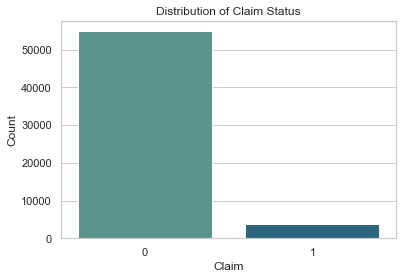

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x='is_claim', data=df, palette='crest')
plt.title('Distribution of Claim Status')
plt.xlabel('Claim')
plt.ylabel('Count')
plt.show()


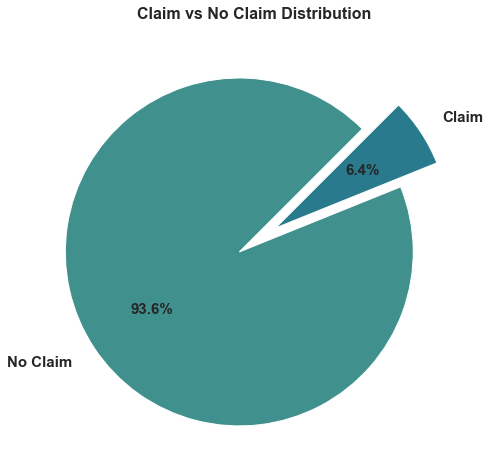

In [13]:
colors = sns.color_palette("crest")[2:4]

fig = plt.figure(facecolor = 'white', figsize=(10,8))
ax = fig.add_subplot(1, 1, 1, facecolor = 'white')

plt.pie(df['is_claim'].value_counts(),
        labels = ['No Claim', 'Claim'],
        radius = 1,
        colors = colors,
        autopct='%1.1f%%',
        explode = [0.1, 0.15],
        labeldistance=1.15,
        startangle=45,
        textprops={'fontsize':15, 'fontweight': 'bold'}
       )

fig.patch.set_facecolor('white')
plt.title('Claim vs No Claim Distribution', fontsize=16, fontweight='bold')
plt.show()

### 2. Distribution of age_of_car and age_of_policyholder

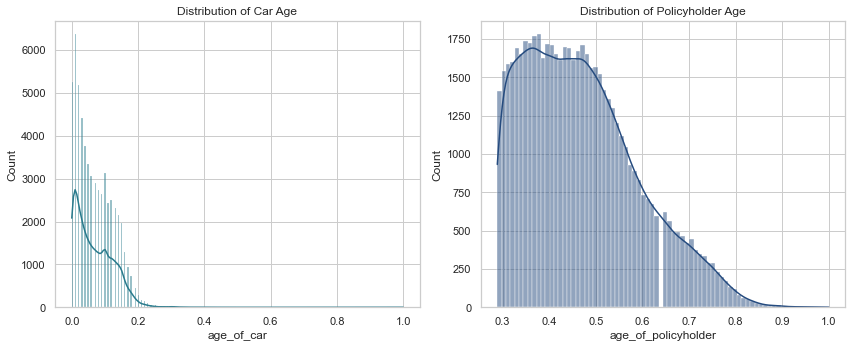

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(df['age_of_car'], kde=True, ax=axes[0], color=sns.color_palette("crest")[3])
axes[0].set_title('Distribution of Car Age')

sns.histplot(df['age_of_policyholder'], kde=True, ax=axes[1], color=sns.color_palette("crest")[5])
axes[1].set_title('Distribution of Policyholder Age')

plt.tight_layout()
plt.show()


### 3. Claim rate by Fuel Type

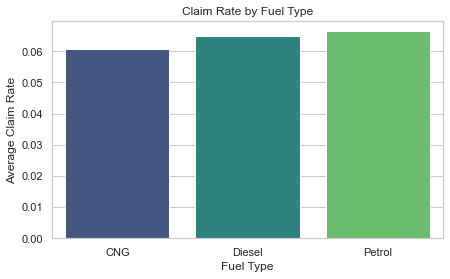

In [15]:
# Claim rate by Fuel Type

fuel_claim_rate = df.groupby('fuel_type')['is_claim'].mean().reset_index()

plt.figure(figsize=(7,4))
sns.barplot(x='fuel_type', y='is_claim', data=fuel_claim_rate, palette='viridis')
plt.title('Claim Rate by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Claim Rate')
plt.show()


### 4. Distribution of population density for claims vs non-claims

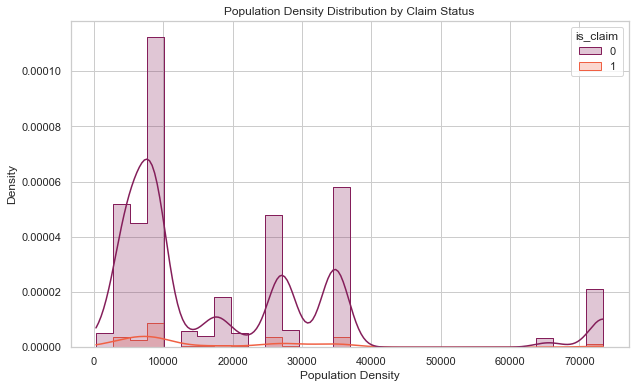

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='population_density', hue='is_claim', bins=30, 
             kde=True, element="step", stat='density', palette='rocket')
plt.title('Population Density Distribution by Claim Status')
plt.xlabel('Population Density')
plt.ylabel('Density')
plt.show()

### 5. Correlation Heatmap of Numeric Features and Claim Status

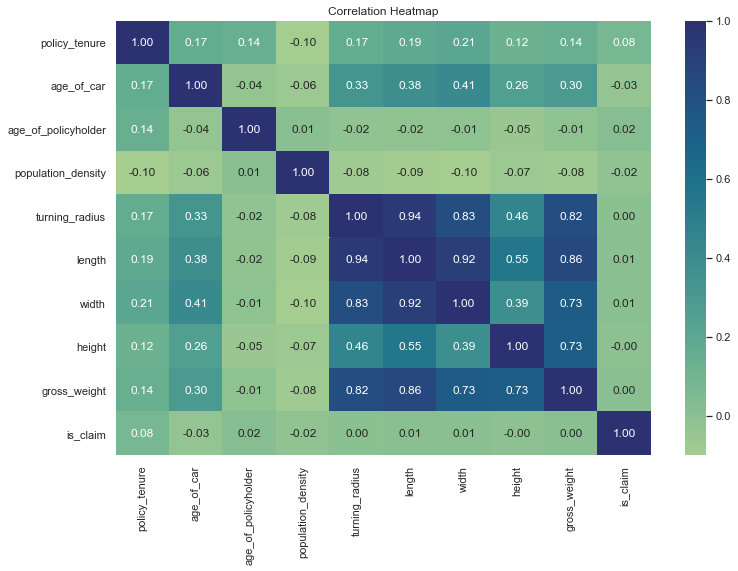

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='crest')
plt.title('Correlation Heatmap')
plt.show()


### 6. Claim Rate by Car Segment

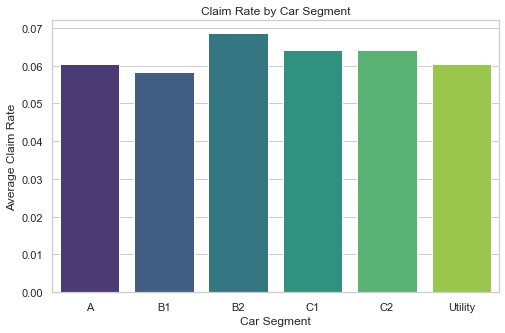

In [18]:
seg_claim_rate = df.groupby('segment')['is_claim'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x='segment', y='is_claim', data=seg_claim_rate, palette='viridis')
plt.title('Claim Rate by Car Segment')
plt.xlabel('Car Segment')
plt.ylabel('Average Claim Rate')
plt.show()


### 7. Average claim rate by number of airbags

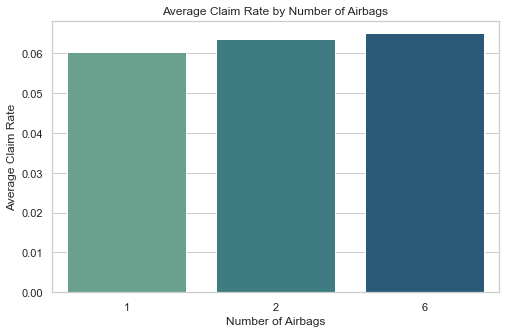

In [19]:

airbag_claim_rate = df.groupby('airbags')['is_claim'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x='airbags', y='is_claim', data=airbag_claim_rate, palette='crest')
plt.title('Average Claim Rate by Number of Airbags')
plt.xlabel('Number of Airbags')
plt.ylabel('Average Claim Rate')
plt.show()

### 8. Claim Rate by Car Make

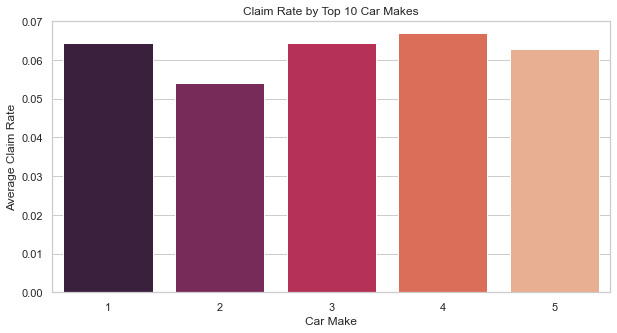

In [20]:
top_makes = df['make'].value_counts().nlargest(10).index
make_claim_rate = df[df['make'].isin(top_makes)].groupby('make')['is_claim'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x='make', y='is_claim', data=make_claim_rate, palette='rocket')
plt.title('Claim Rate by Top 10 Car Makes')
plt.xlabel('Car Make')
plt.ylabel('Average Claim Rate')
plt.show()

### 9. Claim rate by Transmission Type


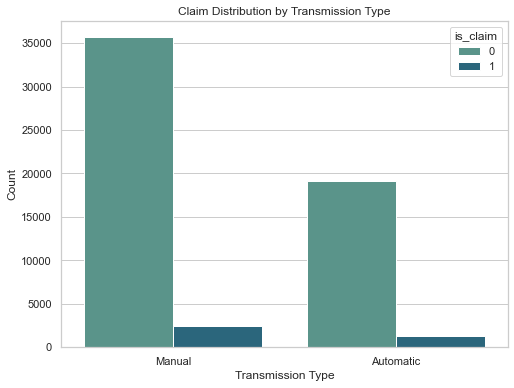

In [21]:
plt.figure(figsize=(8,6))
sns.countplot(x='transmission_type', hue='is_claim', data=df, palette='crest')
plt.title('Claim Distribution by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.show()


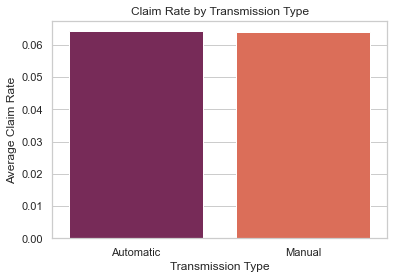

In [22]:
trans_claim_rate = df.groupby('transmission_type')['is_claim'].mean().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(x='transmission_type', y='is_claim', data=trans_claim_rate, palette='rocket')
plt.title('Claim Rate by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Average Claim Rate')
plt.show()

### 10. Distribution of claims by NCAP rating

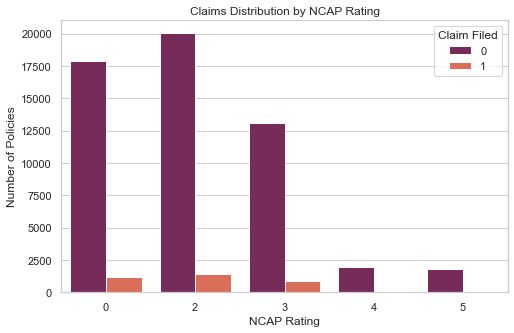

In [23]:
# Distribution of claims by NCAP rating
plt.figure(figsize=(8,5))
sns.countplot(x='ncap_rating', hue='is_claim', data=df, palette='rocket')
plt.title('Claims Distribution by NCAP Rating')
plt.xlabel('NCAP Rating')
plt.ylabel('Number of Policies')
plt.legend(title='Claim Filed')
plt.show()

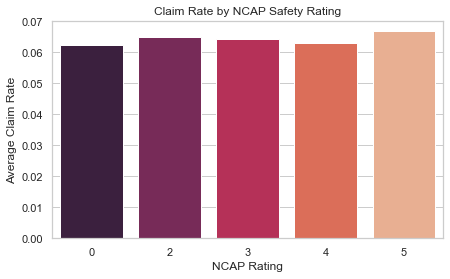

In [24]:
ncap_claim_rate = df.groupby('ncap_rating')['is_claim'].mean().reset_index()
plt.figure(figsize=(7,4))
sns.barplot(x='ncap_rating', y='is_claim', data=ncap_claim_rate, palette='rocket')
plt.title('Claim Rate by NCAP Safety Rating')
plt.xlabel('NCAP Rating')
plt.ylabel('Average Claim Rate')
plt.show()


# 3. Data Preparation

In [27]:
df.select_dtypes("object")

,policy_id,area_cluster,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,ID00001,C1,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,...,No,No,No,No,Yes,No,No,No,Yes,0
1,ID00002,C2,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,...,No,No,No,No,Yes,No,No,No,Yes,0
2,ID00003,C3,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,...,No,No,No,No,Yes,No,No,No,Yes,0
3,ID00004,C4,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
4,ID00005,C5,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,...,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,ID58588,C8,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,...,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2
58588,ID58589,C14,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,...,No,No,No,No,Yes,No,No,No,Yes,0
58589,ID58590,C5,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,...,No,No,No,No,Yes,No,No,No,Yes,0
58590,ID58591,C8,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2


**Feature Elimination** : Removed RecordID as it's not useful feature for assessing the health impact. 

**Scaling**: Standardized numerical features using MinMaxScaler to improve model performance. 

**One Hot Encoding**: Converted categorical variables into a binary matrix where each category is represented as a vector with one "1" and the rest "0s".


In [28]:
# Removal of policy_id column
df.drop("policy_id",axis=1,inplace=True)

In [29]:
# Transforming Yes and No values into Booleans
df = df.replace({ "No" : False , "Yes" : True })

In [30]:
# List of numerical columns based on your dataset description
numerical_cols = [
    'policy_tenure', 'age_of_car', 'age_of_policyholder', 
     'population_density', 'displacement', 
    'turning_radius', 'length', 'width', 'height', 'gross_weight'
]

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the numerical features
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [31]:
df[numerical_cols].head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,displacement,turning_radius,length,width,height,gross_weight
0,-0.230283,-0.342447,1.422557,-0.783513,-1.375713,-1.108893,-1.301882,-1.402768,-0.983846,-0.942828
1,0.148188,-0.871359,-0.768362,0.462975,-1.375713,-1.108893,-1.301882,-1.402768,-0.983846,-0.942828
2,0.555022,-0.871359,-0.690115,-0.835268,-1.375713,-1.108893,-1.301882,-1.402768,-0.983846,-0.942828
3,0.697883,0.715378,-0.298879,0.158275,0.130093,-0.231926,0.464026,0.559973,-0.481470,-0.236684
4,-0.035840,0.715378,1.344310,0.900969,-0.613422,0.645040,-0.383610,-0.831789,-0.795455,-1.084057


In [32]:
df.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,-0.230283,-0.342447,1.422557,C1,-0.783513,1,A,M1,CNG,60Nm@3500rpm,...,False,False,False,True,False,False,False,True,0,0
1,0.148188,-0.871359,-0.768362,C2,0.462975,1,A,M1,CNG,60Nm@3500rpm,...,False,False,False,True,False,False,False,True,0,0
2,0.555022,-0.871359,-0.690115,C3,-0.835268,1,A,M1,CNG,60Nm@3500rpm,...,False,False,False,True,False,False,False,True,0,0
3,0.697883,0.715378,-0.298879,C4,0.158275,1,C1,M2,Petrol,113Nm@4400rpm,...,True,True,True,True,True,True,True,True,2,0
4,-0.035840,0.715378,1.344310,C5,0.900969,2,A,M3,Petrol,91Nm@4250rpm,...,False,True,True,True,False,True,True,True,2,0


In [33]:
#Passing the dataframe to a new variable so that it doesn't disturb the exploratory analysis
categorical_cols = df.select_dtypes(include=['object']).columns

df = pd.get_dummies(df, columns=categorical_cols, drop_first = True)

In [34]:
df.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,...,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,rear_brakes_type_Drum,transmission_type_Manual,steering_type_Manual,steering_type_Power
0,-0.230283,-0.342447,1.422557,-0.783513,1,2,False,False,False,True,...,0,1,0,0,0,0,1,1,0,1
1,0.148188,-0.871359,-0.768362,0.462975,1,2,False,False,False,True,...,0,1,0,0,0,0,1,1,0,1
2,0.555022,-0.871359,-0.690115,-0.835268,1,2,False,False,False,True,...,0,1,0,0,0,0,1,1,0,1
3,0.697883,0.715378,-0.298879,0.158275,1,2,True,True,False,True,...,0,0,0,0,0,0,1,0,0,0
4,-0.035840,0.715378,1.344310,0.900969,2,2,False,False,False,False,...,0,0,0,0,0,0,1,0,0,0


In [35]:
df.shape

(58592, 101)

**Mean Imputation** : Checked if there any missing values and Replaced missing values with Mean imputation techniques. 

In [36]:
def mean_imputation(df):
    """
    Performs mean imputation on a Pandas DataFrame.

    Args:
    df: The Pandas DataFrame to impute.

    Returns:
    A Pandas DataFrame with missing values imputed using the mean of each column.
    """
    df_imputed = df.copy()  # Create a copy to avoid modifying the original DataFrame
    for col in df_imputed.columns:
        if df_imputed[col].isnull().any():  # Check if the column has any missing values
            mean_val = df_imputed[col].mean()
            df_imputed[col].fillna(mean_val, inplace=True) #Perform the imputation
    return df_imputed

In [37]:
df = mean_imputation(df)

**Train-Test Split**: Divided the dataset into training (80%) and testing (20%) sets.

In [49]:
# Features and target
X = df.drop('is_claim', axis=1)
y = df['is_claim']

# Train-Test Split (stratify to maintain class ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [51]:
# Handle imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [52]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((70200, 100), (17550, 100), (70200,), (17550,))

# 4. Model Development and Evaluation

**Model Training & Evaluation** : Designed and developed ML models

In [57]:
# Dictionary to hold models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=200, random_state=42),
    'XGBoost': XGBClassifier( 
                             use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    #'SVM': SVC(probability=True, class_weight='balanced', random_state=42)
}

In [58]:
# Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"------ {name} ------")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
    print()

------ Logistic Regression ------
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.64      0.63      8779
           1       0.63      0.61      0.62      8771

    accuracy                           0.63     17550
   macro avg       0.63      0.63      0.63     17550
weighted avg       0.63      0.63      0.63     17550

Confusion Matrix:
[[5639 3140]
 [3396 5375]]
ROC AUC Score: 0.685897977767942

------ Random Forest ------
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      8779
           1       0.91      0.92      0.92      8771

    accuracy                           0.91     17550
   macro avg       0.91      0.91      0.91     17550
weighted avg       0.91      0.91      0.91     17550

Confusion Matrix:
[[7945  834]
 [ 664 8107]]
ROC AUC Score: 0.9723268357526886

------ XGBoost ------
Classification Report:
              precision    recall 

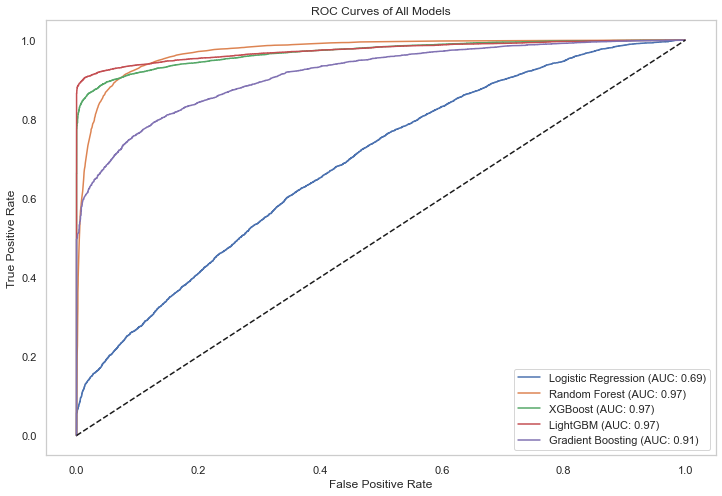

In [59]:
# Plot ROC Curves
plt.figure(figsize=(12,8))

for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC: {roc_auc_score(y_test, y_proba):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves of All Models')
plt.legend(loc='lower right')
plt.grid()
plt.show()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 43875, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 87750, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
------ Ensemble Voting Classifier ------
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      8779
           1       1.00      0.95      0.97      8771

    accuracy                           0.97     17550
   macro avg       0.97      0.97      0.97     17550
weighted avg       0.97      0.97      0.97     17550

Confusion Matrix:
[[8758 

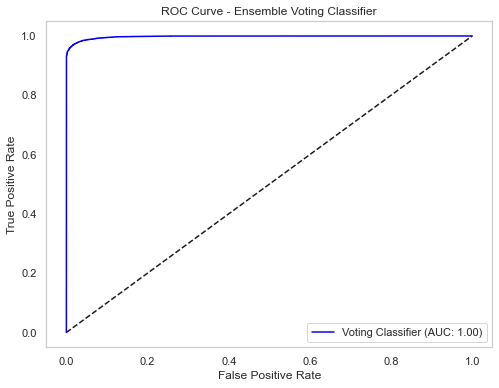

In [60]:

# Define base models (keep your top-performing ones)
voting_models = [
    ('rf', RandomForestClassifier( n_estimators=200, random_state=42)),
    ('xgb', XGBClassifier(
                          use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('lgbm', LGBMClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42))
]

# Voting Classifier - Soft Voting
voting_clf = VotingClassifier(estimators=voting_models, voting='soft')

# Fit with SMOTE balanced training data
voting_clf.fit(X_train_res, y_train_res)

# Predictions
y_pred = voting_clf.predict(X_test)
y_proba = voting_clf.predict_proba(X_test)[:, 1]

# Evaluate Performance
print("------ Ensemble Voting Classifier ------")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Voting Classifier (AUC: {roc_auc_score(y_test, y_proba):.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Ensemble Voting Classifier')
plt.legend(loc='lower right')
plt.grid()
plt.show()


- Voting classifier demonstrated superior predictive performance and should be preferred.